In [1]:
# External Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Internal Libraries
from config import *

In [ ]:
performance_log = pd.read_csv(
    DATA_DIR / "training" / "performance_benchmark" / "fine_grain_training.dat", sep=";"
)
number_of_sample = 32

result_name = f"Test {number_of_sample} varians w 0.2% sample each on exp mass predict {16*number_of_sample} random ext samples"
epochs = [250, 100, 50]
batches = [32, 16, 4]

In [ ]:
# Loading the result
result = pd.read_csv(DATA_DIR / "output" / f"{result_name}.dat", sep=";")
rms_deviation = np.sqrt((result["Difference"] ** 2).mean())
std_difference = result["Difference"].std()

execution_time = performance_log.query(f'training_name=="{result_name}"')[
    "training_time"
].iloc[0]
print(f"rms_deviation: {rms_deviation}")
print(f"std: {std_difference}")
print(f"execution_time: {execution_time}")

rms_deviation: 73.93557468417953
std: 60.4596677532546
execution_time: 108.6363127231598


Text(0, 0.5, 'Z')

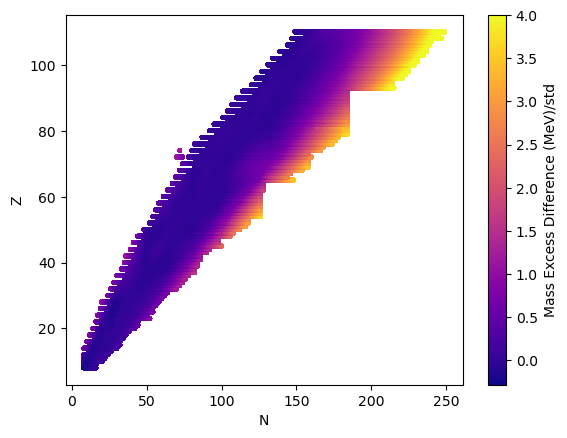

In [ ]:
# Plot the mass excess difference across the nuclear landscape
diff_o_std = result["Difference"] / std_difference
v_min, v_max = -4, 4

plt.scatter(
    result["N"], result["Z"], c=np.clip(diff_o_std, v_min, v_max), cmap="plasma", s=5
)

plt.colorbar(label="Mass Excess Difference (MeV)/std")
plt.xlabel("N")
plt.ylabel("Z")

Text(0, 0.5, 'log_10(Val_Loss)')

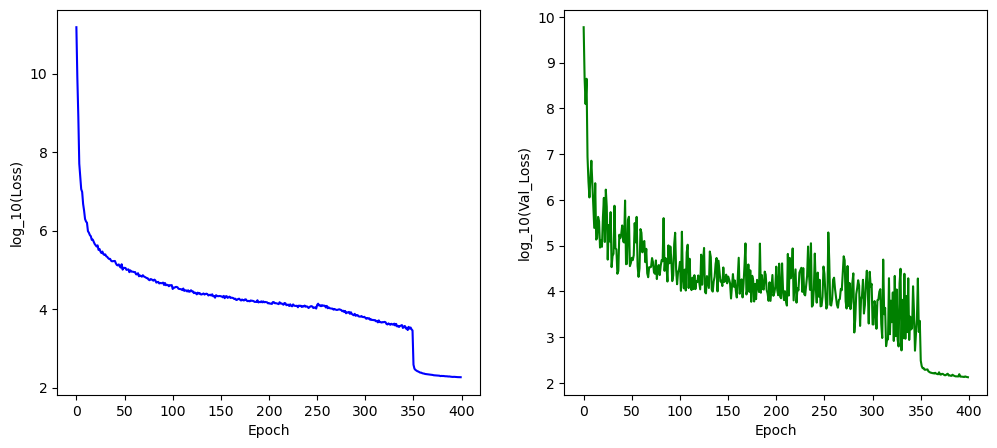

In [ ]:
# Loss analyisis
# Combine the loss from several steps
loss_dir = DATA_DIR / "training" / "loss"
loss_file = [
    loss_dir / f"{result_name}.batch={batches[i]}.epoch={epochs[i]}.stage{i+1}.loss.dat"
    for i in range(3)
]
val_loss_file = [
    loss_dir
    / f"{result_name}.batch={batches[i]}.epoch={epochs[i]}.stage{i+1}.val_loss.dat"
    for i in range(3)
]

loss_data = [np.loadtxt(file) for file in loss_file]
val_loss_data = [np.loadtxt(file) for file in val_loss_file]

loss_arr = [item for sublist in loss_data for item in sublist]
val_loss_arr = [item for sublist in val_loss_data for item in sublist]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(np.log(loss_arr), label="loss", color="blue")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("log_10(Loss)")

axes[1].plot(np.log(val_loss_arr), label="cos(x)", color="green")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("log_10(Val_Loss)")

Text(0.5, 0, 'Number of varian')

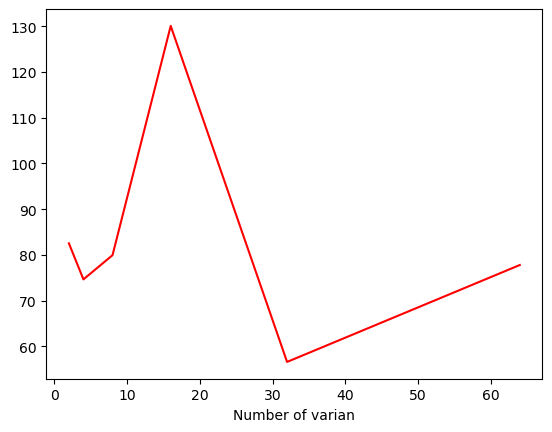

In [ ]:
test_param = [2, 4, 8, 16, 32, 64]
mass_table = [
    f"Test {number_of_sample} varians w 0.2% sample each on exp mass predict {8*number_of_sample} random ext samples"
    for number_of_sample in test_param
]
rms_deviation_arr = []
std_difference_arr = []
execution_time_arr = []

for data in mass_table:
    result = pd.read_csv(DATA_DIR / "output" / f"{data}.dat", sep=";")
    rms_deviation = np.sqrt((result["Difference"] ** 2).mean())
    std_difference = result["Difference"].std()
    execution_time = performance_log.query(f'training_name=="{data}"')[
        "training_time"
    ].iloc[0]

    rms_deviation_arr.append(rms_deviation)
    std_difference_arr.append(std_difference)
    execution_time_arr.append(execution_time)

plt.plot(test_param, rms_deviation_arr, color="red")
plt.xlabel("Number of varian")

Text(0, 0.5, 'std difference')

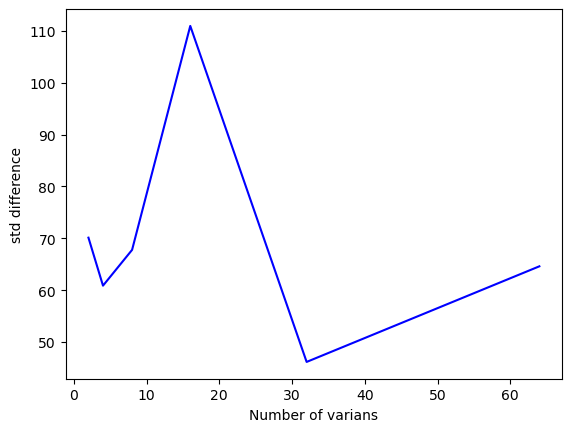

In [ ]:
plt.plot(test_param, std_difference_arr, color="blue")
plt.xlabel("Number of varians")
plt.ylabel("std difference")

In [ ]:
# predict exp data
# varian train to predict ratio 1:1

"Test 128 varians w 0.2% sample each on exp mass predict 512 random samples.dat",
"Test 64 varians w 0.2% sample each on exp mass predict 256 random samples.dat",
"Test 32 varians w 0.2% sample each on exp mass predict 128 random samples.dat",
"Test 16 varians w 0.2% sample each on exp mass predict 64 random samples.dat",
"Test 8 varians w 0.2% sample each on exp mass predict 32 random samples.dat",
"Test 4 varians w 0.2% sample each on exp mass predict 16 random samples.dat",

"Test 128 varians w 0.2% sample each on exp mass predict 384 random samples.dat",
"Test 64 varians w 0.2% sample each on exp mass predict 192 random samples.dat",
"Test 32 varians w 0.2% sample each on exp mass predict 96 random samples.dat",
"Test 16 varians w 0.2% sample each on exp mass predict 48 random samples.dat",
"Test 8 varians w 0.2% sample each on exp mass predict 24 random samples.dat",
"Test 4 varians w 0.2% sample each on exp mass predict 12 random samples.dat",
"Test 2 varians w 0.2% sample each on exp mass predict 6 random samples.dat",

import run_analysis

files = [
    "Test 128 varians w 0.2% sample each on exp mass predict other 128 random samples.dat",
    "Test 64 varians w 0.2% sample each on exp mass predict other 64 random samples.dat",
    "Test 32 varians w 0.2% sample each on exp mass predict other 32 random samples.dat",
    "Test 16 varians w 0.2% sample each on exp mass predict other 16 random samples.dat",
    "Test 8 varians w 0.2% sample each on exp mass predict other 8 random samples.dat",
    "Test 4 varians w 0.2% sample each on exp mass predict other 4 random samples.dat",
    "Test 2 varians w 0.2% sample each on exp mass predict other 2 random samples.dat",
]
files.reverse()

results = [run_analysis.analyse(file) for file in files]
rms_dev = [result["rms_dev"] for result in results]
std_diff = [result["std_diff"] for result in results]

2025-01-06 21:06:02.626886: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-06 21:06:02.649061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-06 21:06:02.674139: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-06 21:06:02.681553: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-06 21:06:02.701792: I tensorflow/core/platform/cpu_feature_guar

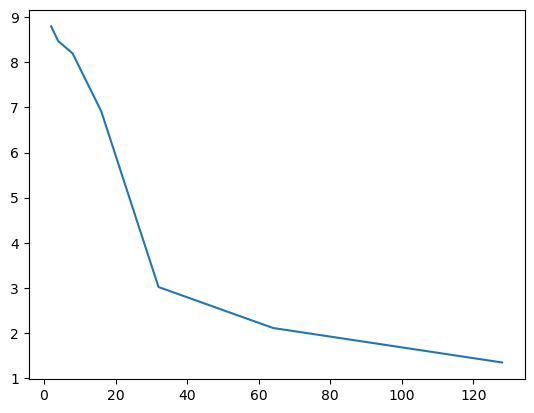

In [ ]:
import matplotlib.pyplot as plt

varians = [2, 4, 8, 16, 32, 64, 128]
plt.plot(varians, rms_dev)

In [ ]:
def analyse_varian_effect(varians, files):
    files.reverse()
    results = [run_analysis.analyse(file) for file in files]
    rms_dev = [result["rms_dev"] for result in results]
    std_diff = [result["std_diff"] for result in results]

    return

In [ ]:
def extract_data(file):
    df = pd.read_csv(file, sep=";")
    melted_df = df.groupby(["Z", "N"]).agg({"Prediction": ["mean", "std"]})

    return data